In [1]:
import pandas as pd
import os

In [27]:
data_folder = '../../../data/point_data/data_sources/census_2021/QUERIED/'
data_folder1 = '../../../data/point_data/data_sources/census_2021/COLLECTED/'

# 1

# We merge everything in here

In [9]:
first_f = 'age-census2021-ts007a-lsoa.csv' 
DF = pd.read_csv(data_folder1 + first_f)
for f in os.listdir(data_folder1):
    if f.endswith('-lsoa.csv') and f != first_f:
        print(f)
        df = pd.read_csv(data_folder1 + f)
        if not 'date' in df.columns:
            df['date'] = 2021
        
        DF = DF.merge(df, on=['date', 'geography', 'geography code'])

maritalstatus-census2021-lsoa.csv
hourswork-census2021-ts059-lsoa.csv
unemployed-census2021-ts065-lsoa.csv
religion-census2021-ts030-lsoa.csv
sex-census2021-ts008-lsoa.csv
deprivations_v2-lsoa.csv
language-census2021-ts029-lsoa.csv
disability-census2021-ts040-lsoa.csv
distancetowork-census2021-ts058-lsoa.csv
health-census2021-ts037-lsoa.csv
householdtype-census2021-ts003-lsoa.csv
methodtraveltowork-census2021-ts061-lsoa.csv
numhouseholds-census2021-ts041-lsoa.csv


In [10]:
DF.head()

,date,geography,geography code,Age: Total,Age: Aged 4 years and under,Age: Aged 5 to 9 years,Age: Aged 10 to 14 years,Age: Aged 15 to 19 years,Age: Aged 20 to 24 years,Age: Aged 25 to 29 years,...,Method of travel to workplace: Train,"Method of travel to workplace: Bus, minibus or coach",Method of travel to workplace: Taxi,"Method of travel to workplace: Motorcycle, scooter or moped",Method of travel to workplace: Driving a car or van,Method of travel to workplace: Passenger in a car or van,Method of travel to workplace: Bicycle,Method of travel to workplace: On foot,Method of travel to workplace: Other method of travel to work,Number of households: Number of households; measures: Value
0,2021,City of London 001A,E01000001,1473,52,34,32,23,90,159,...,17,13,4,3,18,0,24,109,4,838
1,2021,City of London 001B,E01000002,1384,33,24,22,31,100,166,...,10,15,2,1,19,3,25,92,7,824
2,2021,City of London 001C,E01000003,1613,39,32,33,23,96,187,...,21,26,4,4,24,7,62,143,17,1017
3,2021,City of London 001E,E01000005,1101,52,45,35,89,118,97,...,25,44,2,3,33,1,18,90,8,480
4,2021,Barking and Dagenham 016A,E01000006,1842,153,127,110,122,124,130,...,104,60,1,5,227,10,6,61,17,554


In [11]:
len(DF)

35672

In [12]:
# DF.to_csv('../data/glavni/raw_full_controls.csv', index=None)

## Age

In [13]:
f = 'age-census2021-ts007a-lsoa.csv' 

df = pd.read_csv(data_folder1 + f)
del df['date']
# df['percent aged 65plus'] = (df['Age: Aged 65 to 69 years']+df['Age: Aged 70 to 74 years']+\
#                              +df['Age: Aged 75 to 79 years']++df['Age: Aged 80 to 84 years']+\
#                              df['Age: Aged 85 years and over'])/df['Age: Total']
# df['percent children up to 14'] = (df['Age: Aged 4 years and under']+df['Age: Aged 5 to 9 years']+\
#                              +df['Age: Aged 10 to 14 years']+\
#                              df['Age: Aged 85 years and over'])/df['Age: Total']
df['total population'] = df['Age: Total']

# df_rural = df[['total population', 'geography code', 'geography']]

del df['Age: Total']
df_age = df.copy()

for c in df_age.columns:
    if c not in ['geography',	'geography code', 'total population']:
        df_age[c] = df_age[c]/df_age['total population']
        df_age.rename(columns={c:c.replace("Age:", "percent")}, inplace=True)
        df_age.rename(columns={c : c.lower()}, inplace=True)


df_age = df_age.set_index(['geography',	'geography code'])
df_age.head()

,,percent Aged 4 years and under,percent Aged 5 to 9 years,percent Aged 10 to 14 years,percent Aged 15 to 19 years,percent Aged 20 to 24 years,percent Aged 25 to 29 years,percent Aged 30 to 34 years,percent Aged 35 to 39 years,percent Aged 40 to 44 years,percent Aged 45 to 49 years,percent Aged 50 to 54 years,percent Aged 55 to 59 years,percent Aged 60 to 64 years,percent Aged 65 to 69 years,percent Aged 70 to 74 years,percent Aged 75 to 79 years,percent Aged 80 to 84 years,percent Aged 85 years and over,total population
geography,geography code,,,,,,,,,,,,,,,,,,,
City of London 001A,E01000001,0.035302,0.023082,0.021724,0.015614,0.061100,0.107943,0.089613,0.079430,0.077393,0.071283,0.060421,0.049559,0.056348,0.080788,0.069246,0.038697,0.038697,0.023761,1473
City of London 001B,E01000002,0.023844,0.017341,0.015896,0.022399,0.072254,0.119942,0.096821,0.079480,0.066474,0.070809,0.088150,0.063584,0.062861,0.054913,0.049855,0.042630,0.031069,0.021676,1384
City of London 001C,E01000003,0.024179,0.019839,0.020459,0.014259,0.059516,0.115933,0.102914,0.089275,0.068816,0.070056,0.096094,0.073156,0.068816,0.053317,0.052697,0.030998,0.019219,0.020459,1613
City of London 001E,E01000005,0.047230,0.040872,0.031789,0.080836,0.107175,0.088102,0.107175,0.079927,0.055404,0.052679,0.079019,0.074478,0.060854,0.031789,0.023615,0.015441,0.012716,0.010899,1101
Barking and Dagenham 016A,E01000006,0.083062,0.068947,0.059718,0.066232,0.067318,0.070575,0.094463,0.081976,0.089034,0.083062,0.065689,0.046145,0.038002,0.035831,0.022258,0.009772,0.009229,0.008686,1842


## Sex

In [14]:
f = 'sex-census2021-ts008-lsoa.csv'
df = pd.read_csv(data_folder1 + f)
del df['date']
df['percent male'] = df['Sex: Male; measures: Value']/df['Sex: All persons; measures: Value']
for c in ['Sex: All persons; measures: Value','Sex: Male; measures: Value', 'Sex: Female; measures: Value']:
    del df[c]
df_sex = df.set_index(['geography',	'geography code'])
df_sex.head()

,,percent male
geography,geography code,
Hartlepool 001A,E01011954,0.474376
Hartlepool 001B,E01011969,0.494048
Hartlepool 001C,E01011970,0.485981
Hartlepool 001D,E01011971,0.480726
Hartlepool 001F,E01033465,0.496675


## Deprivation

In [15]:
f = 'deprivations_v2-lsoa.csv'
df = pd.read_csv(data_folder1 + f)
del df['data']

df_dep=df[['geography', 'geography code', 'Total: All households']+\
          [c for c in df.columns if 'Household is' in c]].copy()

for c in df_dep.columns:
    if c not in ['geography',	'geography code', 'Total: All households']:
        df_dep[c] = df_dep[c]/df_dep['Total: All households']
        df_dep.rename(columns={c:c.replace("Household is", "percent households")}, inplace=True)
        df_dep.rename(columns={c : c.lower()}, inplace=True)

del df_dep['Total: All households']

df_dep = df_dep.set_index(['geography',	'geography code'])
df_dep.head()

,,percent households not deprived in any dimension,percent households deprived in one dimension,percent households deprived in two dimensions,percent households deprived in three dimensions,percent households deprived in four dimensions
geography,geography code,,,,,
Hartlepool 001A,E01011954,0.403946,0.315680,0.214953,0.064382,0.001038
Hartlepool 001B,E01011969,0.507463,0.330017,0.147595,0.014925,0.000000
Hartlepool 001C,E01011970,0.514344,0.348361,0.125000,0.012295,0.000000
Hartlepool 001D,E01011971,0.626204,0.283237,0.086705,0.003854,0.000000
Hartlepool 001F,E01033465,0.620270,0.282432,0.089189,0.008108,0.000000


## Language

In [16]:
f = 'language-census2021-ts029-lsoa.csv'
df = pd.read_csv(data_folder1 + f)
del df['date']
del df['Proficiency in English language: Main language is not English (English or Welsh in Wales)']

df_tmp = df.copy()
        
for c in df_tmp.columns:
    if c not in ['geography',	'geography code', 'Proficiency in English language: Total: All usual residents aged 3 years and over']:
        df_tmp[c] = df_tmp[c]/df_tmp['Proficiency in English language: Total: All usual residents aged 3 years and over']
        c2 = c.replace("(English or Welsh in Wales)", "")
        c2 = c2.replace("Proficiency in English language:", "")
        c2 = c2.replace("Main language is not English :", "")
        c2 = "percent " + c2
        c2 = c2.lower()
        df_tmp.rename(columns={c: c2}, inplace=True)

del df_tmp['Proficiency in English language: Total: All usual residents aged 3 years and over']  

df_lan = df_tmp.set_index(['geography',	'geography code'])
df_lan.head()

,,percent main language is english,percent can speak english very well,percent can speak english well,percent cannot speak english well,percent cannot speak english
geography,geography code,,,,,
City of London 001A,E01000001,0.859903,0.114562,0.022084,0.002761,0.000690
City of London 001B,E01000002,0.824652,0.146001,0.025679,0.003668,0.000000
City of London 001C,E01000003,0.842371,0.115385,0.034048,0.008197,0.000000
City of London 001E,E01000005,0.705882,0.123249,0.103641,0.056022,0.011204
Barking and Dagenham 016A,E01000006,0.642081,0.115495,0.168096,0.061750,0.012579


## Health

In [17]:
f = 'health-census2021-ts037-lsoa.csv'
df = pd.read_csv(data_folder1 + f)
del df['date']

df_tmp = df.copy()
        
for c in df_tmp.columns:
    if c not in ['geography',	'geography code', 'General health: Total: All usual residents']:
        df_tmp[c] = df_tmp[c]/df_tmp['General health: Total: All usual residents']
        c2 = c.replace("General health:", "percent")
        c2 = c2.lower()
        df_tmp.rename(columns={c: c2}, inplace=True)

del df_tmp['General health: Total: All usual residents'] 

df_health = df_tmp.set_index(['geography',	'geography code'])
df_health.head()

,,percent very good health,percent good health,percent fair health,percent bad health,percent very bad health
geography,geography code,,,,,
City of London 001A,E01000001,0.582373,0.317288,0.080678,0.012203,0.007458
City of London 001B,E01000002,0.604046,0.305636,0.067197,0.017341,0.005780
City of London 001C,E01000003,0.489771,0.363918,0.114693,0.027278,0.004340
City of London 001E,E01000005,0.455455,0.352727,0.120000,0.057273,0.014545
Barking and Dagenham 016A,E01000006,0.476448,0.367623,0.121819,0.028695,0.005414


## Unemployment

In [18]:
f = 'health-census2021-ts037-lsoa.csv'
total_residents = pd.read_csv(data_folder1 + f)[['General health: Total: All usual residents', 'geography code']]
total_residents.rename(columns={'General health: Total: All usual residents':'total residents'}, inplace=True)

f = 'unemployed-census2021-ts065-lsoa.csv'
df = pd.read_csv(data_folder1 + f)
df = df.merge(total_residents, on =['geography code'])
df['percent unemployed'] = df['Unemployment history: Total: All usual residents aged 16 years and over not in employment the week before the census']/\
    df['total residents']
df=df[['geography',	'geography code', 'percent unemployed']]

df_unempl = df.set_index(['geography',	'geography code'])
df_unempl.head()

,,percent unemployed
geography,geography code,
City of London 001A,E01000001,0.329492
City of London 001B,E01000002,0.302023
City of London 001C,E01000003,0.312461
City of London 001E,E01000005,0.420909
Barking and Dagenham 016A,E01000006,0.294532


## Marital

In [19]:

f = 'maritalstatus-census2021-lsoa.csv'
df = pd.read_csv(data_folder1 + f)

# df['percent married or in civil partnership'] = \
#     df['Marital and civil partnership status: Married or in a registered civil partnership; measures: Value']/\
#     df['Marital and civil partnership status: Total; measures: Value']
# df=df[['geography',	'geography code', 'percent married or in civil partnership']]

df_tmp = df.copy()
        
for c in df_tmp.columns:
    if c not in ['geography',	'geography code', 'Marital and civil partnership status: Total; measures: Value']:
        df_tmp[c] = df_tmp[c]/df_tmp['Marital and civil partnership status: Total; measures: Value']
        c2 = c.replace("Marital and civil partnership status:", "percent")
        c2 = c2.replace("; measures: Value", "")
        c2 = c2.lower()
        df_tmp.rename(columns={c: c2}, inplace=True)

del df_tmp['Marital and civil partnership status: Total; measures: Value']

df_married = df_tmp.set_index(['geography',	'geography code'])
df_married.head()

,,date,percent never married and never registered a civil partnership,percent married or in a registered civil partnership,percent married or in a registered civil partnership: married,percent married or in a registered civil partnership: married: opposite sex,percent married or in a registered civil partnership: married: same sex,percent married or in a registered civil partnership: in a registered civil partnership,percent married or in a registered civil partnership: in a registered civil partnership: opposite sex,percent married or in a registered civil partnership: in a registered civil partnership: same sex,"percent separated, but still legally married or still legally in a civil partnership","percent separated, but still legally married or still legally in a civil partnership: separated, but still married","percent separated, but still legally married or still legally in a civil partnership: separated, but still in a registered civil partnership",percent divorced or civil partnership dissolved,percent divorced or civil partnership dissolved: divorced,percent divorced or civil partnership dissolved: formerly in a civil partnership now legally dissolved,percent widowed or surviving civil partnership partner,percent widowed or surviving civil partnership partner: widowed,percent widowed or surviving civil partnership partner: surviving partner from civil partnership
geography,geography code,,,,,,,,,,,,,,,,,,
Hartlepool 001A,E01011954,1.150911,0.441913,0.386674,0.382688,0.380979,0.001708,0.003986,0.0,0.003986,0.021071,0.021071,0.0,0.087699,0.086560,0.001139,0.062642,0.062642,0.0
Hartlepool 001B,E01011969,1.760453,0.269164,0.558362,0.558362,0.557491,0.000871,0.000000,0.0,0.000000,0.018293,0.018293,0.0,0.080139,0.080139,0.000000,0.074042,0.074042,0.0
Hartlepool 001C,E01011970,2.156884,0.274280,0.574173,0.574173,0.574173,0.000000,0.000000,0.0,0.000000,0.014941,0.014941,0.0,0.077908,0.077908,0.000000,0.058698,0.058698,0.0
Hartlepool 001D,E01011971,1.871296,0.342593,0.524074,0.524074,0.524074,0.000000,0.000000,0.0,0.000000,0.022222,0.022222,0.0,0.074074,0.074074,0.000000,0.037037,0.037037,0.0
Hartlepool 001F,E01033465,1.357287,0.359973,0.504365,0.504365,0.502351,0.002015,0.000000,0.0,0.000000,0.024177,0.024177,0.0,0.075218,0.075218,0.000000,0.036266,0.036266,0.0


# Join all of these

In [20]:
DF = df_age.join(df_married).join(df_unempl).join(df_health).\
            join(df_lan).join(df_dep).join(df_sex)

In [21]:
DF_first_part = DF.copy()

In [22]:
# DF.to_csv('../data/glavni/full_controls_first_group.csv')

# 2

In [23]:
import pandas as pd
import os

In [24]:
# data_folder = '../data/controls/2021/QUERIED/'
# data_folder1 = '../data/controls/2021/COLLECTED/'

## Ethnic background

In [28]:
first_f = 'ethnic_background.csv' 
DF = pd.read_csv(data_folder + first_f).\
    rename(columns={'mnemonic':'geography code'})

In [29]:
DF['percent asian'] = DF['Asian, Asian British or Asian Welsh'] / DF['Total: All usual residents']

DF['percent black'] = DF['Black, Black British, Black Welsh, Caribbean or African'] / DF['Total: All usual residents']

DF['percent mixed'] = DF['Mixed or Multiple ethnic groups'] / DF['Total: All usual residents']

DF['percent white'] = DF['White'] / DF['Total: All usual residents']

# DF['percent other ethnic'] = DF['Other ethnic group'] / DF['Total: All usual residents']

In [30]:
df_ethnic = DF[['geography code', 'percent asian','percent black', 'percent mixed', 'percent white']].\
            set_index(['geography code'])

## Religion

In [31]:
f2 = 'religion.csv' 
DF = pd.read_csv(data_folder + f2).\
    rename(columns={'mnemonic':'geography code'})

In [32]:
DF['percent no religion'] = DF['No religion'] / DF['Total: All usual residents']

DF['percent christian'] = DF['Christian'] / DF['Total: All usual residents']

DF['percent buddhist'] = DF['Buddhist'] / DF['Total: All usual residents']

DF['percent hindu'] = DF['Hindu'] / DF['Total: All usual residents']

DF['percent jewish'] = DF['Jewish'] / DF['Total: All usual residents']

DF['percent muslim'] = DF['Muslim'] / DF['Total: All usual residents']

DF['percent sikh'] = DF['Sikh'] / DF['Total: All usual residents']

# DF['percent other religion'] = DF['Other religion'] / DF['Total: All usual residents']

In [33]:
df_religion=DF[['geography code', 'percent sikh', 'percent hindu', \
                'percent christian', 'percent jewish', 'percent buddhist',\
                'percent no religion','percent muslim',\
               ]].set_index(['geography code'])

## central heating

In [34]:
first_f = 'central_heating.csv' 
DF = pd.read_csv(data_folder + first_f).\
    rename(columns={'mnemonic':'geography code'})

In [35]:
DF.head()

,2021 super output area - lower layer,geography code,Total: All households,No central heating,Wood only,District or communal heat networks only
0,Hartlepool 001A,E01011954,964,6,0,3
1,Hartlepool 001B,E01011969,603,5,0,1
2,Hartlepool 001C,E01011970,484,10,0,0
3,Hartlepool 001D,E01011971,518,0,0,0
4,Hartlepool 001F,E01033465,738,0,0,0


In [36]:
DF['percent no central heating'] = DF['No central heating'] / DF['Total: All households']

DF['percent wood heating'] = DF['Wood only'] / DF['Total: All households']

DF['percent communal heating'] = DF['District or communal heat networks only'] / DF['Total: All households']

In [37]:
df_heating = DF[['geography code', 'percent no central heating','percent wood heating',\
                  'percent communal heating']].set_index(['geography code'])

## distance travelled to work

In [38]:
first_f = 'distance_to_work.csv' 
DF = pd.read_csv(data_folder + first_f).\
    rename(columns={'mnemonic':'geography code'})

In [39]:
DF.head()

,2021 super output area - lower layer,geography code,Total: All usual residents aged 16 years and over in employment the week before the census,Less than 2km,2km to less than 5km,60km and over,Works mainly from home
0,Hartlepool 001A,E01011954,951,125,206,20,113
1,Hartlepool 001B,E01011969,555,33,130,17,82
2,Hartlepool 001C,E01011970,520,14,104,19,102
3,Hartlepool 001D,E01011971,760,41,135,20,145
4,Hartlepool 001F,E01033465,1029,63,175,26,228


In [40]:
DF['percent TFW less than 2km'] = DF['Less than 2km'] / DF['Total: All usual residents aged 16 years and over in employment the week before the census']

DF['percent TFW 2km to 5km'] = DF['2km to less than 5km'] / DF['Total: All usual residents aged 16 years and over in employment the week before the census']

DF['percent TFW 60km and over'] = DF['60km and over'] / DF['Total: All usual residents aged 16 years and over in employment the week before the census']

DF['percent WFH'] = DF['Works mainly from home'] / DF['Total: All usual residents aged 16 years and over in employment the week before the census']


In [41]:
df_distance2work = DF[['geography code', 'percent TFW less than 2km',\
                       'percent TFW 2km to 5km',\
       'percent TFW 60km and over', 'percent WFH']].set_index(['geography code'])

# Hours worked

In [42]:
first_f = 'hours_worked.csv' 
DF = pd.read_csv(data_folder + first_f).\
    rename(columns={'mnemonic':'geography code'})

In [43]:
DF.head()

,2021 super output area - lower layer,geography code,Total: All usual residents aged 16 years and over in employment the week before the census,Part-time,Part-time: 15 hours or less worked,Full-time,Full-time: 49 or more hours worked
0,Hartlepool 001A,E01011954,952,331,80,621,70
1,Hartlepool 001B,E01011969,556,146,42,410,50
2,Hartlepool 001C,E01011970,521,144,35,377,58
3,Hartlepool 001D,E01011971,759,209,55,550,74
4,Hartlepool 001F,E01033465,1028,268,69,760,119


In [44]:
DF['percent part-time'] = DF['Part-time'] / DF['Total: All usual residents aged 16 years and over in employment the week before the census']

DF['percent 15 hours or less worked'] = DF['Part-time: 15 hours or less worked'] / DF['Total: All usual residents aged 16 years and over in employment the week before the census']

DF['percent full-time'] = DF['Full-time'] / DF['Total: All usual residents aged 16 years and over in employment the week before the census']

DF['percent 49 or more hours worked'] = DF['Full-time: 49 or more hours worked'] / DF['Total: All usual residents aged 16 years and over in employment the week before the census']


In [45]:
df_hours_worked = DF[['geography code', 'percent part-time',\
                      'percent 15 hours or less worked',\
                      'percent 49 or more hours worked', 'percent full-time']].set_index(['geography code'])

## Commute type

In [46]:
first_f = 'commute_type.csv' 
DF = pd.read_csv(data_folder + first_f).\
    rename(columns={'mnemonic':'geography code'})

DF.head()

,2021 super output area - lower layer,geography code,Total: All usual residents aged 16 years and over in employment the week before the census,Work mainly at or from home,"Underground, metro, light rail, tram",Train,"Bus, minibus or coach",Taxi,"Motorcycle, scooter or moped",Driving a car or van,Passenger in a car or van,Bicycle,On foot
0,Hartlepool 001A,E01011954,950,113,0,3,39,19,3,604,71,14,77
1,Hartlepool 001B,E01011969,556,82,0,5,16,4,1,376,37,8,16
2,Hartlepool 001C,E01011970,522,102,0,8,14,3,4,342,28,3,13
3,Hartlepool 001D,E01011971,762,145,0,5,12,4,0,519,43,3,20
4,Hartlepool 001F,E01033465,1026,228,2,10,15,11,1,672,37,5,28


In [47]:
DF['percent commute metro rail'] = DF['Underground, metro, light rail, tram'] / DF['Total: All usual residents aged 16 years and over in employment the week before the census']

DF['percent commute train'] = DF['Train'] / DF['Total: All usual residents aged 16 years and over in employment the week before the census']

DF['percent commute car'] = DF['Driving a car or van'] / DF['Total: All usual residents aged 16 years and over in employment the week before the census']

DF['percent commute bus'] = DF['Bus, minibus or coach'] / DF['Total: All usual residents aged 16 years and over in employment the week before the census']

DF['percent commute bicycle'] = DF['Bicycle'] / DF['Total: All usual residents aged 16 years and over in employment the week before the census']

DF['percent commute on foot'] = DF['On foot'] / DF['Total: All usual residents aged 16 years and over in employment the week before the census']


In [48]:
df_commute = DF[['geography code', 'percent commute on foot', 'percent commute metro rail', \
         'percent commute bus', 'percent commute bicycle', 'percent commute train', 'percent commute car']].\
        set_index(['geography code'])


## Population density

In [49]:
f2 = 'popdensity-nomis_2023_03_01_224549.csv'
df = pd.read_csv(data_folder1 + f2)

df['geography code'] = df['LSOA_2021'].apply(lambda x: str(x).split(' : ')[0])
del df['LSOA_2021']
df['pop_density'] = df['pop_density'].str.replace(',', '').astype(float)
df_pop = df.copy()
df_pop = df_pop.set_index(['geography code'])
df_pop.head()

,pop_density
geography code,
E01011954,5432.9
E01011969,1430.7
E01011970,2913.9
E01011971,6049.4
E01033465,4311.9


# Migrant Indicator

In [50]:
first_f = 'migrant_indicator.csv' 
DF = pd.read_csv(data_folder + first_f).\
    rename(columns={'mnemonic':'geography code'})

DF.head()

,2021 super output area - lower layer,geography code,Total: All usual residents,Address one year ago is the same as the address of enumeration,Address one year ago is student term-time or boarding school address in the UK,Migrant from within the UK: Address one year ago was in the UK,Migrant from outside the UK: Address one year ago was outside the UK
0,Hartlepool 001A,E01011954,2254.0,2119.0,0.0,132.0,3.0
1,Hartlepool 001B,E01011969,1333.0,1265.0,0.0,68.0,0.0
2,Hartlepool 001C,E01011970,1058.0,977.0,4.0,77.0,0.0
3,Hartlepool 001D,E01011971,1315.0,1247.0,1.0,66.0,1.0
4,Hartlepool 001F,E01033465,1940.0,1778.0,2.0,159.0,1.0


In [51]:
DF['percent same address'] = DF['Address one year ago is the same as the address of enumeration'] / DF['Total: All usual residents']

DF['percent student moved to address'] = DF['Address one year ago is student term-time or boarding school address in the UK'] / DF['Total: All usual residents']

DF['percent from within UK moved to address'] = DF['Migrant from within the UK: Address one year ago was in the UK'] / DF['Total: All usual residents']

DF['percent outside UK moved to address'] =  DF['Migrant from outside the UK: Address one year ago was outside the UK'] / DF['Total: All usual residents']

In [52]:
df_migrant = DF[['geography code', 'percent same address', 'percent student moved to address',\
                 'percent from within UK moved to address', 'percent outside UK moved to address']].\
        set_index(['geography code'])

# Lenght of Residence

In [53]:
first_f = 'lenght_of_residence.csv' 
DF = pd.read_csv(data_folder + first_f).\
    rename(columns={'mnemonic':'geography code'})

DF.head()

,2021 super output area - lower layer,geography code,Total: All usual residents,%,Born in the UK,%.1,10 years or more,%.2,"5 years or more, but less than 10 years",%.3,"2 years or more, but less than 5 years",%.4,Less than 2 years,%.5
0,Hartlepool 001A,E01011954,2283.0,100.0,2232.0,97.8,27.0,1.2,14.0,0.6,10.0,0.4,0.0,0.0
1,Hartlepool 001B,E01011969,1344.0,100.0,1324.0,98.5,14.0,1.0,2.0,0.1,4.0,0.3,0.0,0.0
2,Hartlepool 001C,E01011970,1070.0,100.0,1050.0,98.1,15.0,1.4,4.0,0.4,1.0,0.1,0.0,0.0
3,Hartlepool 001D,E01011971,1323.0,100.0,1311.0,99.1,10.0,0.8,1.0,0.1,1.0,0.1,0.0,0.0
4,Hartlepool 001F,E01033465,1956.0,100.0,1909.0,97.6,34.0,1.7,6.0,0.3,5.0,0.3,2.0,0.1


In [54]:
DF['percent born in the UK'] = DF['Born in the UK'] / DF['Total: All usual residents']

DF['percent 10 years or more'] = DF['10 years or more'] / DF['Total: All usual residents']

DF['percent 5 years or more, but less than 10 years'] = DF['5 years or more, but less than 10 years'] / DF['Total: All usual residents']

DF['percent 2 years or more, but less than 5 years'] =  DF['2 years or more, but less than 5 years'] / DF['Total: All usual residents']

DF['percent less than 2 years'] =  DF['Less than 2 years'] / DF['Total: All usual residents']

In [55]:
df_length_residence = DF[['geography code', 'percent born in the UK', 'percent 10 years or more',\
        'percent 2 years or more, but less than 5 years', 'percent 5 years or more, but less than 10 years',\
         'percent less than 2 years']].\
        set_index(['geography code'])

# Occupancy rating rooms

In [56]:
first_f = 'occupancy_rating_rooms.csv' 
DF = pd.read_csv(data_folder + first_f).\
    rename(columns={'mnemonic':'geography code'})

DF.head()

,2021 super output area - lower layer,geography code,Total: All households,Occupancy rating of rooms: +2 or more,Occupancy rating of rooms: +1,Occupancy rating of rooms: 0,Occupancy rating of rooms: -1,Occupancy rating of rooms: -2 or less
0,Hartlepool 001A,E01011954,964.0,344.0,336.0,244.0,34.0,6.0
1,Hartlepool 001B,E01011969,603.0,396.0,158.0,41.0,5.0,3.0
2,Hartlepool 001C,E01011970,485.0,293.0,146.0,39.0,6.0,1.0
3,Hartlepool 001D,E01011971,520.0,319.0,143.0,51.0,5.0,2.0
4,Hartlepool 001F,E01033465,740.0,503.0,170.0,58.0,8.0,1.0


In [57]:
DF['percent occupancy rating rooms: +2'] = DF['Occupancy rating of rooms: +2 or more'] / DF['Total: All households']

DF['percent occupancy rating rooms: +1'] = DF['Occupancy rating of rooms: +1'] / DF['Total: All households']

DF['percent occupancy rating rooms: 0'] = DF['Occupancy rating of rooms: 0'] / DF['Total: All households']

DF['percent occupancy rating rooms: -1'] =  DF['Occupancy rating of rooms: -1'] / DF['Total: All households']

DF['percent occupancy rating rooms: -2'] =  DF['Occupancy rating of rooms: -2 or less'] / DF['Total: All households']

In [58]:
df_occupancy_rooms = DF[['geography code', 'percent occupancy rating rooms: +2',\
         'percent occupancy rating rooms: 0', 'percent occupancy rating rooms: +1',\
         'percent occupancy rating rooms: -2', 'percent occupancy rating rooms: -1']].\
        set_index(['geography code'])

# Occupancy rating bedrooms

In [59]:
first_f = 'occupancy_rating_bedrooms.csv' 
DF = pd.read_csv(data_folder + first_f).\
    rename(columns={'mnemonic':'geography code'})

DF.head()

,2021 super output area - lower layer,geography code,Total: All households,%,Occupancy rating of bedrooms: +2 or more,%.1,Occupancy rating of bedrooms: +1,%.2,Occupancy rating of bedrooms: 0,%.3,Occupancy rating of bedrooms: -1,%.4,Occupancy rating of bedrooms: -2 or less,%.5
0,Hartlepool 001A,E01011954,963.0,100.0,307.0,31.9,369.0,38.3,261.0,27.1,23.0,2.4,3.0,0.3
1,Hartlepool 001B,E01011969,601.0,100.0,317.0,52.7,210.0,34.9,71.0,11.8,3.0,0.5,0.0,0.0
2,Hartlepool 001C,E01011970,483.0,100.0,257.0,53.2,179.0,37.1,43.0,8.9,4.0,0.8,0.0,0.0
3,Hartlepool 001D,E01011971,520.0,100.0,252.0,48.5,203.0,39.0,61.0,11.7,4.0,0.8,0.0,0.0
4,Hartlepool 001F,E01033465,740.0,100.0,415.0,56.1,239.0,32.3,79.0,10.7,7.0,0.9,0.0,0.0


In [60]:
DF['percent occupancy rating bedrooms: +2'] = DF['Occupancy rating of bedrooms: +2 or more'] / DF['Total: All households']

DF['percent occupancy rating bedrooms: +1'] = DF['Occupancy rating of bedrooms: +1'] / DF['Total: All households']

DF['percent occupancy rating bedrooms: 0'] = DF['Occupancy rating of bedrooms: 0'] / DF['Total: All households']

DF['percent occupancy rating bedrooms: -1'] =  DF['Occupancy rating of bedrooms: -1'] / DF['Total: All households']

DF['percent occupancy rating bedrooms: -2'] =  DF['Occupancy rating of bedrooms: -2 or less'] / DF['Total: All households']

In [61]:
df_occupancy_bedrooms = DF[['geography code', 'percent occupancy rating bedrooms: +2', \
         'percent occupancy rating bedrooms: 0', 'percent occupancy rating bedrooms: +1', \
         'percent occupancy rating bedrooms: -2', 'percent occupancy rating bedrooms: -1']].\
        set_index(['geography code'])

# Industry

In [62]:
first_f = 'industry.csv' 
DF = pd.read_csv(data_folder + first_f).\
    rename(columns={'mnemonic':'geography code'})

DF.head()

,2021 super output area - middle layer,geography code,Total: All usual residents aged 16 years and over in employment the week before the census,%,"A: Agriculture, Forestry and fishing",%.1,B: Mining and quarrying,%.2,C: Manufacturing,%.3,...,N: Administrative and support service activities,%.14,O: Public administration and defence; compulsory social security,%.15,P: Education,%.16,Q: Human health and social work activities,%.17,"R, S, T, U Other",%.18
0,Hartlepool 001,E02002483,4927,100,23,0.5,101,2.0,518,10.5,...,172,3.5,386,7.8,551,11.2,811,16.5,160,3.2
1,Hartlepool 002,E02002484,3632,100,10,0.3,27,0.7,389,10.7,...,197,5.4,212,5.8,286,7.9,700,19.3,109,3.0
2,Hartlepool 003,E02002485,2952,100,4,0.1,20,0.7,272,9.2,...,140,4.7,178,6.0,251,8.5,531,18.0,107,3.6
3,Hartlepool 007,E02002489,2508,100,0,0.0,14,0.6,201,8.0,...,111,4.4,166,6.6,269,10.7,399,15.9,103,4.1
4,Hartlepool 008,E02002490,2163,100,3,0.1,22,1.0,250,11.6,...,102,4.7,130,6.0,185,8.6,338,15.6,78,3.6


In [63]:
df_tmp = DF[['geography code']+[c for c in DF.columns if ':' in c]].copy()

for c in df_tmp.columns:
    if c not in ['geography',	'geography code', 'Total: All usual residents aged 16 years and over in employment the week before the census']:
        df_tmp[c] = df_tmp[c]/df_tmp['Total: All usual residents aged 16 years and over in employment the week before the census']
        c2 = "percent " + c
        df_tmp.rename(columns={c: c2}, inplace=True)

del df_tmp['Total: All usual residents aged 16 years and over in employment the week before the census']
df_tmp.head()


,geography code,"percent A: Agriculture, Forestry and fishing",percent B: Mining and quarrying,percent C: Manufacturing,"percent D: Electricity, gas, steam and air conditioning supply","percent E: Water supply; Sewerage, Waste management and Remediation activities",percent F: Construction,percent G: Wholesale and retail trade; repair of motor vehicles and motorcycles,percent H: Transport and storage,percent I: Accommodation and food service activities,percent J: Information and communication,percent K: Financial and insurance activities,percent L: Real estate activities,"percent M: Professional, scientific and technical activities",percent N: Administrative and support service activities,percent O: Public administration and defence; compulsory social security,percent P: Education,percent Q: Human health and social work activities
0,E02002483,0.004668,0.020499,0.105135,0.018876,0.009336,0.107368,0.134362,0.035722,0.037954,0.024559,0.019484,0.015019,0.044855,0.034910,0.078344,0.111833,0.164603
1,E02002484,0.002753,0.007434,0.107104,0.014317,0.011839,0.095815,0.162170,0.044879,0.061674,0.020374,0.012115,0.012665,0.032764,0.054240,0.058370,0.078744,0.192731
2,E02002485,0.001355,0.006775,0.092141,0.013211,0.012534,0.093835,0.189702,0.034892,0.063008,0.021003,0.013211,0.011518,0.037940,0.047425,0.060298,0.085027,0.179878
3,E02002489,0.000000,0.005582,0.080144,0.011164,0.012360,0.083333,0.174242,0.053429,0.070175,0.017943,0.018740,0.013557,0.041467,0.044258,0.066188,0.107257,0.159091
4,E02002490,0.001387,0.010171,0.115580,0.010633,0.021729,0.110032,0.171521,0.045307,0.051318,0.016181,0.013870,0.012483,0.034674,0.047157,0.060102,0.085529,0.156264


In [64]:
df_industry = df_tmp.set_index(['geography code'])



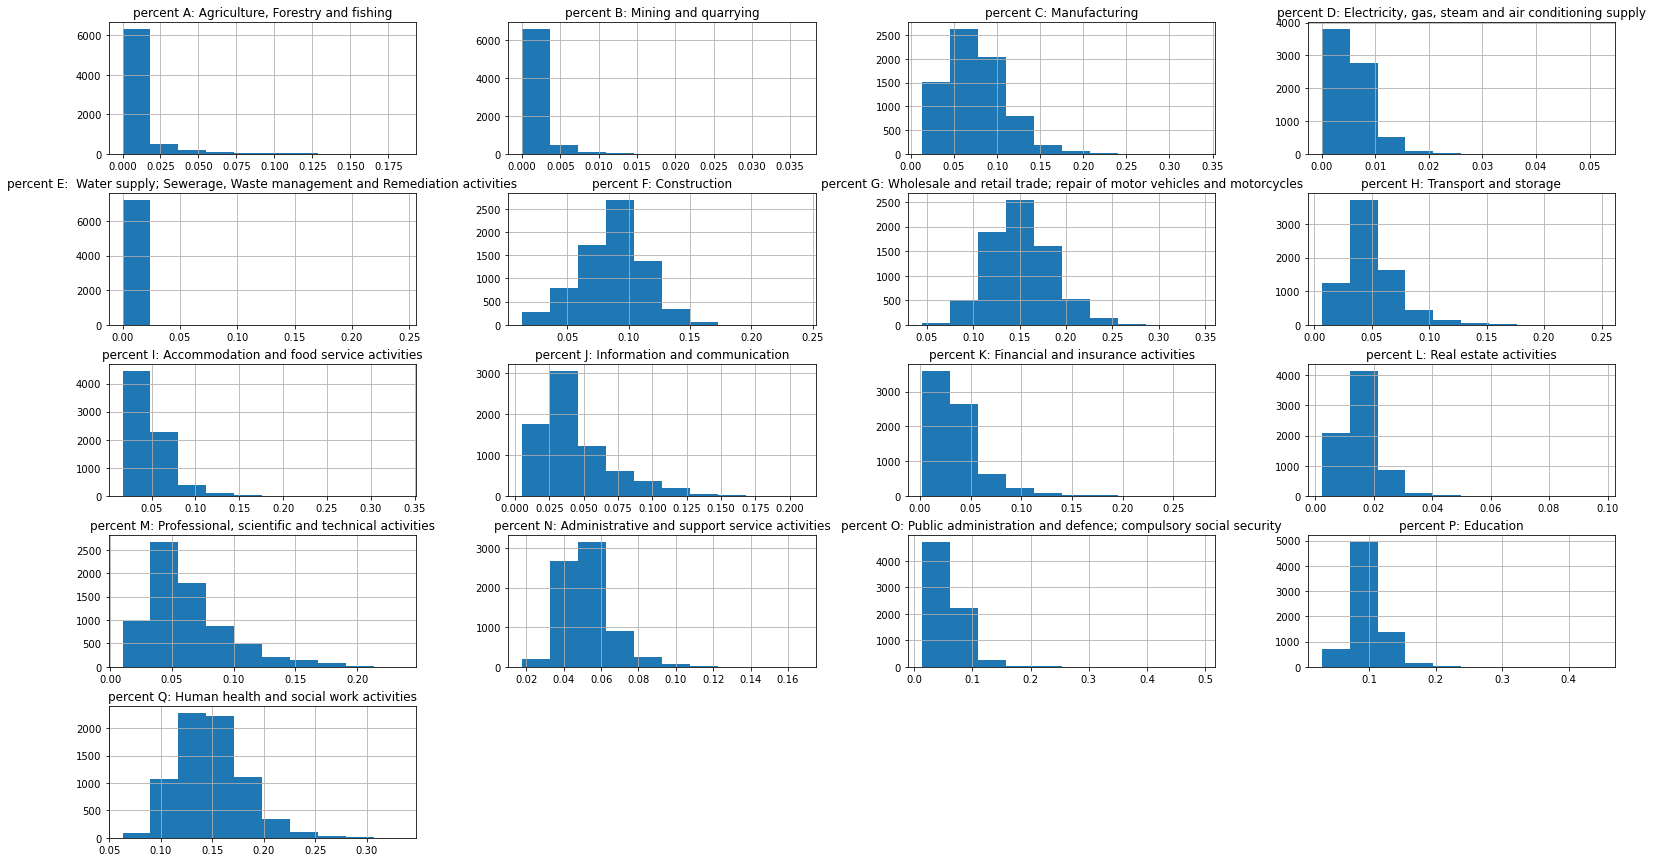

In [65]:
df_industry.hist(figsize=(27,15));

# Occupation

In [66]:
first_f = 'occupation.csv' 
DF = pd.read_csv(data_folder + first_f).\
    rename(columns={'mnemonic':'geography code'})

DF.head()

,2021 super output area - lower layer,geography code,Total: All usual residents aged 16 years and over in employment the week before the census,%,"1. Managers, directors and senior officials",%.1,2. Professional occupations,%.2,3. Associate professional and technical occupations,%.3,...,5. Skilled trades occupations,%.5,"6. Caring, leisure and other service occupations",%.6,7. Sales and customer service occupations,%.7,"8. Process, plant and machine operatives",%.8,9. Elementary occupations,%.9
0,Hartlepool 001A,E01011954,952.0,100.0,60.0,6.3,100.0,10.5,104.0,10.9,...,141.0,14.8,137.0,14.4,106.0,11.1,87.0,9.1,130.0,13.7
1,Hartlepool 001B,E01011969,558.0,100.0,41.0,7.3,83.0,14.9,75.0,13.4,...,89.0,15.9,59.0,10.6,39.0,7.0,61.0,10.9,56.0,10.0
2,Hartlepool 001C,E01011970,521.0,100.0,60.0,11.5,90.0,17.3,71.0,13.6,...,66.0,12.7,53.0,10.2,35.0,6.7,55.0,10.6,38.0,7.3
3,Hartlepool 001D,E01011971,757.0,100.0,95.0,12.5,149.0,19.7,104.0,13.7,...,97.0,12.8,71.0,9.4,53.0,7.0,57.0,7.5,68.0,9.0
4,Hartlepool 001F,E01033465,1027.0,100.0,131.0,12.8,234.0,22.8,150.0,14.6,...,103.0,10.0,76.0,7.4,83.0,8.1,78.0,7.6,65.0,6.3


In [67]:
DF['percent 1. Managers, directors and senior officials'] = DF['1. Managers, directors and senior officials'] / DF['Total: All usual residents aged 16 years and over in employment the week before the census']

DF['percent 2. Professional occupations'] = DF['2. Professional occupations'] / DF['Total: All usual residents aged 16 years and over in employment the week before the census']

DF['percent 3. Associate professional and technical occupations'] = DF['3. Associate professional and technical occupations'] / DF['Total: All usual residents aged 16 years and over in employment the week before the census']

DF['percent 4. Administrative and secretarial occupations'] =  DF['4. Administrative and secretarial occupations'] / DF['Total: All usual residents aged 16 years and over in employment the week before the census']

DF['percent 5. Skilled trades occupations'] =  DF['5. Skilled trades occupations'] / DF['Total: All usual residents aged 16 years and over in employment the week before the census']

DF['percent 6. Caring, leisure and other service occupations'] =  DF['6. Caring, leisure and other service occupations'] / DF['Total: All usual residents aged 16 years and over in employment the week before the census']

DF['percent 7. Sales and customer service occupations'] =  DF['7. Sales and customer service occupations'] / DF['Total: All usual residents aged 16 years and over in employment the week before the census']

DF['percent 8. Process, plant and machine operatives'] =  DF['8. Process, plant and machine operatives'] / DF['Total: All usual residents aged 16 years and over in employment the week before the census']

DF['percent 9. Elementary occupations'] =  DF['9. Elementary occupations'] / DF['Total: All usual residents aged 16 years and over in employment the week before the census']


In [68]:
df_occupation = DF[['geography code', 'percent 1. Managers, directors and senior officials', 'percent 2. Professional occupations',\
         'percent 3. Associate professional and technical occupations',\
         'percent 4. Administrative and secretarial occupations', 'percent 5. Skilled trades occupations', \
         'percent 6. Caring, leisure and other service occupations', 'percent 7. Sales and customer service occupations',\
         'percent 8. Process, plant and machine operatives', \
        'percent 9. Elementary occupations' ]].\
        set_index(['geography code'])

# Merge all into second part

In [69]:
DF_second_part = df_ethnic.join(df_religion).join(df_heating).\
        join(df_distance2work).join(df_hours_worked).join(df_commute).\
        join(df_migrant).join(df_occupancy_bedrooms).join(df_occupancy_rooms).\
        join(df_occupation).join(df_length_residence).\
        join(df_pop)
DF_second_part.head()

,percent asian,percent black,percent mixed,percent white,percent sikh,percent hindu,percent christian,percent jewish,percent buddhist,percent no religion,...,"percent 6. Caring, leisure and other service occupations",percent 7. Sales and customer service occupations,"percent 8. Process, plant and machine operatives",percent 9. Elementary occupations,percent born in the UK,percent 10 years or more,"percent 2 years or more, but less than 5 years","percent 5 years or more, but less than 10 years",percent less than 2 years,pop_density
geography code,,,,,,,,,,,,,,,,,,,,,
E01000001,0.107191,0.007463,0.037992,0.801221,0.000000,0.026441,0.345763,0.019661,0.006780,0.483390,...,0.022910,0.016037,0.006873,0.004582,0.592542,0.177627,0.067797,0.075254,0.086780,11363.6
E01000002,0.130592,0.007937,0.043290,0.782107,0.000000,0.015173,0.338150,0.025289,0.007225,0.491329,...,0.005695,0.003417,0.003417,0.007973,0.548410,0.203757,0.088873,0.083815,0.075145,6062.2
E01000003,0.094913,0.034739,0.062655,0.741315,0.001860,0.011159,0.340360,0.026658,0.008679,0.479851,...,0.027000,0.026000,0.010000,0.042000,0.572846,0.221947,0.061376,0.078115,0.065716,27385.4
E01000005,0.321526,0.108084,0.071753,0.385104,0.000000,0.014519,0.367514,0.012704,0.006352,0.221416,...,0.105263,0.068826,0.032389,0.174089,0.510889,0.285844,0.051724,0.063521,0.088022,5801.7
E01000006,0.479675,0.108401,0.037940,0.327913,0.036295,0.056880,0.371614,0.000542,0.006501,0.070423,...,0.092446,0.076663,0.113867,0.181511,0.481301,0.297019,0.087263,0.093767,0.040650,12585.3


# Save second part

In [176]:
# DF_second_part.to_csv('../data/glavni/full_controls_second_group.csv')

# Read in the first part

In [177]:
# DF_first_part = pd.read_csv('../data/glavni/full_controls_first_group.csv')

# Merge first and second groups

In [70]:
DF_full = DF_second_part.merge(DF_first_part, on=['geography code'])

# Save

In [179]:
DF_full.to_csv('../../../data/point_data/separate_data/controls.csv', index=None)

In [71]:
print (len(DF_full.columns))

111


In [181]:
print (list(DF_full.columns))

['geography code', 'percent asian', 'percent black', 'percent mixed', 'percent white', 'percent sikh', 'percent hindu', 'percent christian', 'percent jewish', 'percent buddhist', 'percent no religion', 'percent muslim', 'percent no central heating', 'percent wood heating', 'percent communal heating', 'percent TFW less than 2km', 'percent TFW 2km to 5km', 'percent TFW 60km and over', 'percent WFH', 'percent part-time', 'percent 15 hours or less worked', 'percent 49 or more hours worked', 'percent full-time', 'percent commute on foot', 'percent commute metro rail', 'percent commute bus', 'percent commute bicycle', 'percent commute train', 'percent commute car', 'percent same address', 'percent student moved to address', 'percent from within UK moved to address', 'percent outside UK moved to address', 'percent occupancy rating bedrooms: +2', 'percent occupancy rating bedrooms: 0', 'percent occupancy rating bedrooms: +1', 'percent occupancy rating bedrooms: -2', 'percent occupancy rating b

In [72]:
print (len(DF))

35679
